<a href="https://colab.research.google.com/github/MichalStrus/CNN_for_all_images/blob/main/CNN_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and data load



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import os

## Avoiding Out of memory errors

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

## Removing dodgy images

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
data_dir = '/content/drive/MyDrive/data-science-bootcamp/data'

Check what's inside of data_dir folder

In [ ]:
os.listdir(data_dir)

['cats', 'dogs']

Check what's inside of happy folder which is inside of data_dir

In [ ]:
os.listdir(os.path.join(data_dir, 'cats'))

['cat.3355.jpg',
 'cat.3602.jpg',
 'cat.3216.jpg',
 'cat.3995.jpg',
 'cat.3769.jpg',
 'cat.3326.jpg',
 'cat.404.jpg',
 'cat.3285.jpg',
 'cat.3812.jpg',
 'cat.3575.jpg',
 'cat.374.jpg',
 'cat.442.jpg',
 'cat.3713.jpg',
 'cat.3261.jpg',
 'cat.543.jpg',
 'cat.3393.jpg',
 'cat.3277.jpg',
 'cat.3946.jpg',
 'cat.3714.jpg',
 'cat.3567.jpg',
 'cat.3953.jpg',
 'cat.400.jpg',
 'cat.3913.jpg',
 'cat.526.jpg',
 'cat.3652.jpg',
 'cat.3914.jpg',
 'cat.495.jpg',
 'cat.340.jpg',
 'cat.3761.jpg',
 'cat.428.jpg',
 'cat.3505.jpg',
 'cat.3422.jpg',
 'cat.329.jpg',
 'cat.3918.jpg',
 'cat.354.jpg',
 'cat.3901.jpg',
 'cat.352.jpg',
 'cat.3728.jpg',
 'cat.545.jpg',
 'cat.3596.jpg',
 'cat.3889.jpg',
 'cat.462.jpg',
 'cat.3919.jpg',
 'cat.3290.jpg',
 'cat.3513.jpg',
 'cat.3232.jpg',
 'cat.50.jpg',
 'cat.3636.jpg',
 'cat.3807.jpg',
 'cat.3855.jpg',
 'cat.3612.jpg',
 'cat.3512.jpg',
 'cat.581.jpg',
 'cat.474.jpg',
 'cat.3310.jpg',
 'cat.3222.jpg',
 'cat.3396.jpg',
 'cat.3372.jpg',
 'cat.3845.jpg',
 'cat.419.jpg',

In [ ]:
image_extens = ['jpeg', 'jpg', 'bmp', 'png']

Removing dodgy images

In [ ]:
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = cv2.imread(image_path)
      tip = imghdr.what(image_path)
      if tip not in image_extens:
        print("Wrong format of file {}".format(image_path))
        os.remove(image_path)
    except Exception as e:
      print("Issue with image {}".format(image_path))

## Load data

In [ ]:
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/data-science-bootcamp/data')

Found 10027 files belonging to 2 classes.


In [ ]:
data_iterator = data.as_numpy_iterator()

In [ ]:
data_iterator

In [ ]:
batch = data_iterator.next()

Images size as numpy arrays

In [ ]:
batch[0].shape

(32, 256, 256, 3)

Class 1 = dog,
Class 0 = cat

In [ ]:
batch[1]

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int32)

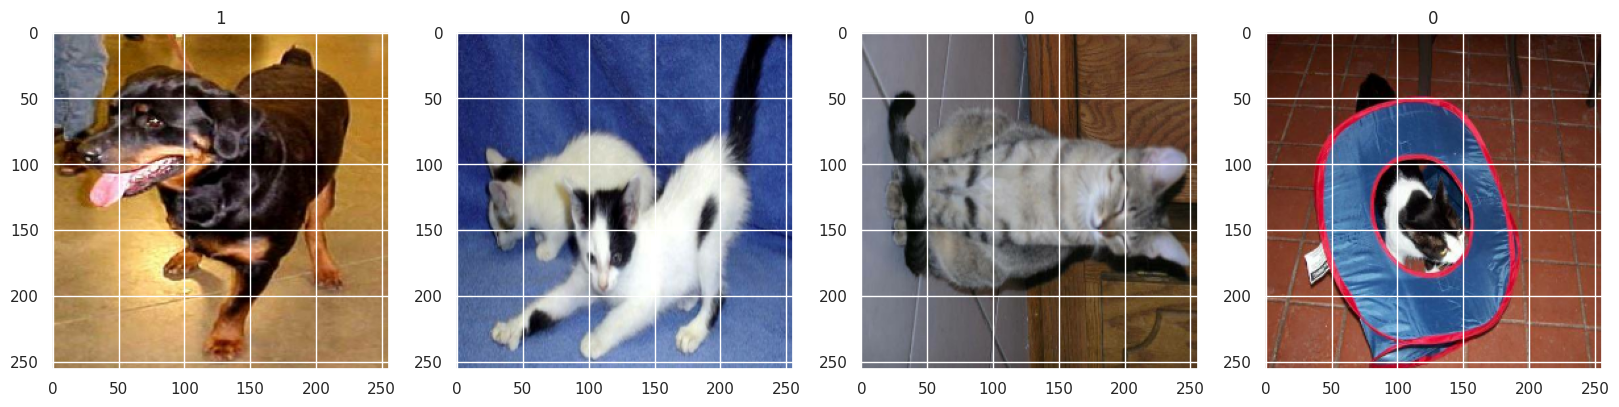

In [ ]:
fig,ax = plt.subplots(ncols = 4, figsize = (20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# Preprocessing data

## Scale data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()[0].max()

1.0

## Split data

In [ ]:
data

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
len(data)

314

In [ ]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1

In [ ]:
train_size+val_size+test_size == len(data)

True

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Building model

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras import callbacks

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D())


model.add(Conv2D(32, (3,3), 1, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())


model.add(Conv2D(16, (3,3), 1, activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))

model.add(Dense(32, activation = 'relu'))

model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 batch_normalization_47 (Bat  (None, 254, 254, 16)     64        
 chNormalization)                                                
                                                                 
 max_pooling2d_54 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_55 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 batch_normalization_48 (Bat  (None, 125, 125, 32)     128       
 chNormalization)                                                
                                                     

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta = 0.001,
                    patience = 5, restore_best_weights = False)

checkpoint = tf.keras.callbacks.ModelCheckpoint('/content/drive/MyDrive/data-science-bootcamp',
                    monitor="val_loss", mode="min",
                    save_best_only=True, verbose=1)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train, epochs = 20, validation_data = val,callbacks = [early_stop, checkpoint])

Epoch 1/20
219/219 [==============================] - ETA: 0s - loss: 0.7405 - accuracy: 0.5952
Epoch 1: val_loss improved from inf to 2.98544, saving model to /content/drive/MyDrive/data-science-bootcamp


219/219 [==============================] - 68s 295ms/step - loss: 0.7405 - accuracy: 0.5952 - val_loss: 2.9854 - val_accuracy: 0.4886
Epoch 2/20
219/219 [==============================] - ETA: 0s - loss: 0.5996 - accuracy: 0.6702
Epoch 2: val_loss improved from 2.98544 to 0.83959, saving model to /content/drive/MyDrive/data-science-bootcamp


219/219 [==============================] - 45s 203ms/step - loss: 0.5996 - accuracy: 0.6702 - val_loss: 0.8396 - val_accuracy: 0.5600
Epoch 3/20
219/219 [==============================] - ETA: 0s - loss: 0.5407 - accuracy: 0.7205
Epoch 3: val_loss improved from 0.83959 to 0.58354, saving model to /content/drive/MyDrive/data-science-bootcamp


219/219 [==============================] - 67s 304ms/step - loss: 0.5407 - accuracy: 0.7205 - val_loss: 0.5835 - val_accuracy: 0.7014
Epoch 4/20
219/219 [==============================] - ETA: 0s - loss: 0.4760 - accuracy: 0.7725
Epoch 4: val_loss improved from 0.58354 to 0.58158, saving model to /content/drive/MyDrive/data-science-bootcamp


219/219 [==============================] - 65s 296ms/step - loss: 0.4760 - accuracy: 0.7725 - val_loss: 0.5816 - val_accuracy: 0.7108
Epoch 5/20
219/219 [==============================] - ETA: 0s - loss: 0.3964 - accuracy: 0.8148
Epoch 5: val_loss improved from 0.58158 to 0.51820, saving model to /content/drive/MyDrive/data-science-bootcamp


219/219 [==============================] - 66s 298ms/step - loss: 0.3964 - accuracy: 0.8148 - val_loss: 0.5182 - val_accuracy: 0.7654
Epoch 6/20
219/219 [==============================] - ETA: 0s - loss: 0.3199 - accuracy: 0.8557
Epoch 6: val_loss did not improve from 0.51820
219/219 [==============================] - 64s 290ms/step - loss: 0.3199 - accuracy: 0.8557 - val_loss: 0.5941 - val_accuracy: 0.7540
Epoch 7/20
219/219 [==============================] - ETA: 0s - loss: 0.2351 - accuracy: 0.9014
Epoch 7: val_loss did not improve from 0.51820
219/219 [==============================] - 64s 289ms/step - loss: 0.2351 - accuracy: 0.9014 - val_loss: 0.6293 - val_accuracy: 0.7505
Epoch 8/20
219/219 [==============================] - ETA: 0s - loss: 0.1778 - accuracy: 0.9308
Epoch 8: val_loss did not improve from 0.51820
219/219 [==============================] - 44s 197ms/step - loss: 0.1778 - accuracy: 0.9308 - val_loss: 0.8702 - val_accuracy: 0.7346
Epoch 9/20
219/219 [===============

## Performance plot

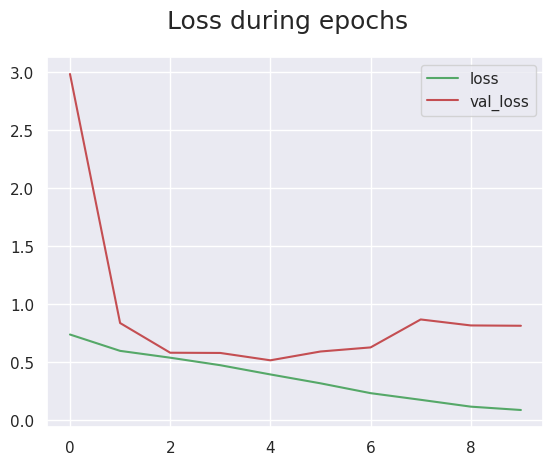

In [ ]:
fig = plt.figure()
plt.plot(history.history['loss'], color = 'g', label = 'loss')
plt.plot(history.history['val_loss'], color = 'r', label = 'val_loss')
fig.suptitle('Loss during epochs', fontsize = 18)
plt.legend(loc = 'upper right')
plt.show()

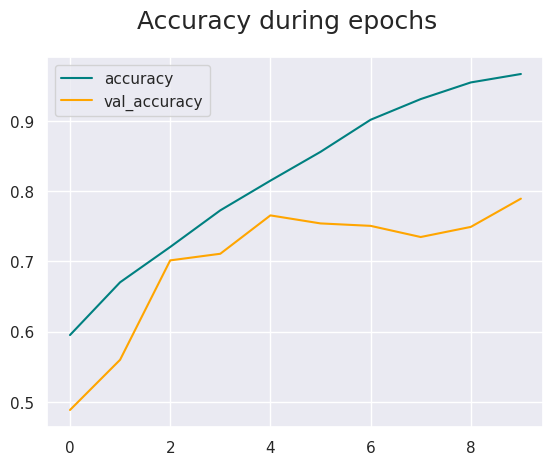

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
fig.suptitle('Accuracy during epochs', fontsize = 18)
plt.legend(loc = 'upper left')
plt.show()

# Evaluate performance

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

Testing our neural network

In [ ]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 120ms/step


In [ ]:
print(f'Precision: {pre.result()}, Recall: {re.result()}, Accuracy: {acc.result()}')

Precision: 0.7316103577613831, Recall: 0.7682672142982483, Accuracy: 0.7547357678413391


## Testing on new data

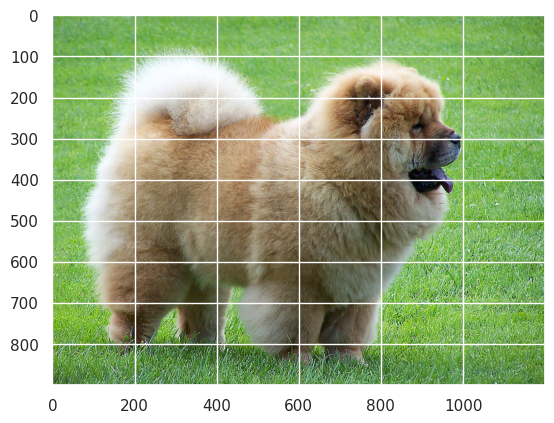

In [ ]:
img = cv2.imread('/content/drive/MyDrive/data-science-bootcamp/1200px-ChowChow2Szczecin.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

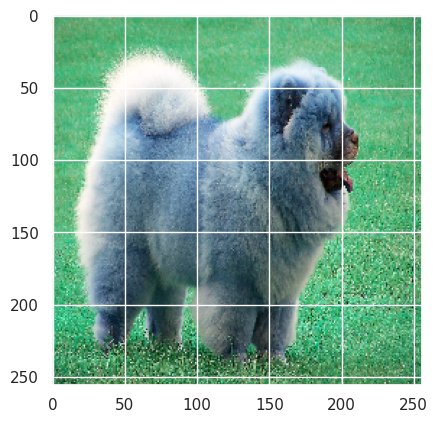

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 28ms/step


In [ ]:
yhat

array([[0.93173856]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print('Dog')
else:
  print('Cat')

Dog
